# 기계학습기초 2022-1 미니프로젝트
#### e비즈니스학과 201823871 박지헌

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split #split 패키지
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', 5)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import plot_tree
import os
from graphviz import Source
from sklearn.tree import export_graphviz
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# 1. EDA
## 1.1 결측치 제거

In [3]:
raw=pd.read_csv("train.csv")
raw = raw.replace('...', None)

# fig = plt.figure(figsize=(10, 4))
# raw.isnull().sum().plot(kind='bar')

raw = raw.iloc[:,:-8]

raw = raw.dropna(axis = 1)

# fig = plt.figure(figsize=(10, 4))
# raw.isnull().sum().plot(kind='bar')

label = pd.read_csv("train_label.csv") ;label

df = pd.merge(raw,label, how='inner', left_on='EMAIL', right_on='SAMPLE_EMAIL')
df.drop(['EMAIL', 'summary_date','SAMPLE_EMAIL', 'sleep_period_id'], axis = 1, inplace = True)
df['DIAG_NM'].replace('CN', 0, inplace=True)
df['DIAG_NM'].replace('MCI', 1, inplace=True)
df['DIAG_NM'].replace('Dem', 2, inplace=True)

df.describe()

v_dict = {}
for i in list(df.columns):
    v_dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(v_dict,index=["unique count"]).transpose()

df.info()

df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9327 entries, 0 to 9326
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   activity_average_met               9327 non-null   float64
 1   activity_cal_active                9327 non-null   int64  
 2   activity_cal_total                 9327 non-null   int64  
 3   activity_daily_movement            9327 non-null   int64  
 4   activity_high                      9327 non-null   int64  
 5   activity_inactive                  9327 non-null   int64  
 6   activity_inactivity_alerts         9327 non-null   int64  
 7   activity_low                       9327 non-null   int64  
 8   activity_medium                    9327 non-null   int64  
 9   activity_met_min_high              9327 non-null   int64  
 10  activity_met_min_inactive          9327 non-null   int64  
 11  activity_met_min_low               9327 non-null   int64

,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,activity_met_min_high,activity_met_min_inactive,activity_met_min_low,activity_met_min_medium,activity_non_wear,activity_rest,activity_score,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_stay_active,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total,sleep_awake,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_average,sleep_hr_lowest,sleep_is_longest,sleep_light,sleep_midpoint_at_delta,sleep_midpoint_time,sleep_onset_latency,sleep_rem,sleep_restless,sleep_rmssd,sleep_score,sleep_score_alignment,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,DIAG_NM
0,1.71875,730,2944,14346,0,417,0,545,47,0,7,432,160,32,399,96,95,100,100,86,100,98,15867,592,13950,16.500,2100,35460,61,70.53,62,1,15030,6693,17280,960,4380,47,20,62,100,41,50,27,97,66,62,-0.12,-0.12,0
1,1.40625,342,2449,6352,0,473,0,392,8,0,8,249,24,29,538,91,78,100,100,83,100,97,7755,400,7680,17.375,2430,24720,69,68.01,63,1,12210,10495,11490,690,2400,56,19,54,100,49,43,46,91,35,44,-0.32,-0.32,0
2,1.46875,401,2544,7297,0,586,0,362,24,0,14,240,76,9,459,93,95,100,100,71,96,96,8341,386,11880,17.000,2820,33240,64,64.89,59,1,15780,5439,17460,1140,2760,48,26,61,100,56,47,34,89,41,62,0.07,0.07,0
3,0.34375,27,1850,491,0,176,0,34,1,0,1,18,3,19,1210,93,95,100,100,74,96,92,8122,35,9600,17.250,1770,29700,68,63.70,57,1,16350,7241,15750,1170,1980,59,30,55,100,35,40,44,86,29,56,-0.41,-0.41,0
4,1.46875,333,2518,5861,0,646,0,377,6,0,15,240,19,19,392,88,95,100,100,65,71,80,7378,383,10710,17.250,3150,31440,66,67.07,60,1,14010,6037,17220,3360,3570,42,23,56,100,64,55,39,14,54,59,-0.27,-0.27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9322,1.34375,227,2316,3863,3,735,2,155,17,21,11,98,57,0,530,72,43,78,100,49,71,97,4453,175,6360,16.250,2640,32760,81,60.21,52,1,18210,8734,16110,810,5550,57,29,76,100,53,46,74,97,84,82,-0.16,-0.16,0
9323,1.34375,249,2351,4411,1,780,4,167,22,7,10,106,82,0,470,61,25,43,100,45,40,95,4972,190,6000,15.875,1710,33360,82,63.75,57,1,19320,8017,16680,450,6330,52,18,77,100,34,57,76,81,95,86,-0.09,-0.09,0
9324,1.53125,570,2682,11057,1,518,1,332,61,7,7,257,198,0,528,78,43,95,100,76,71,93,11878,394,5700,16.125,0,27720,79,67.40,61,1,16140,10129,14070,600,5880,57,15,65,100,1,56,69,86,89,64,0.41,0.41,0
9325,1.34375,295,2331,5135,4,578,0,173,30,28,8,99,107,0,655,70,25,100,100,70,40,95,5752,207,5070,15.625,480,35460,86,64.84,60,1,22170,10630,17490,1140,7740,52,17,81,100,9,59,86,89,98,97,0.27,0.27,0


## 1.2 시각화

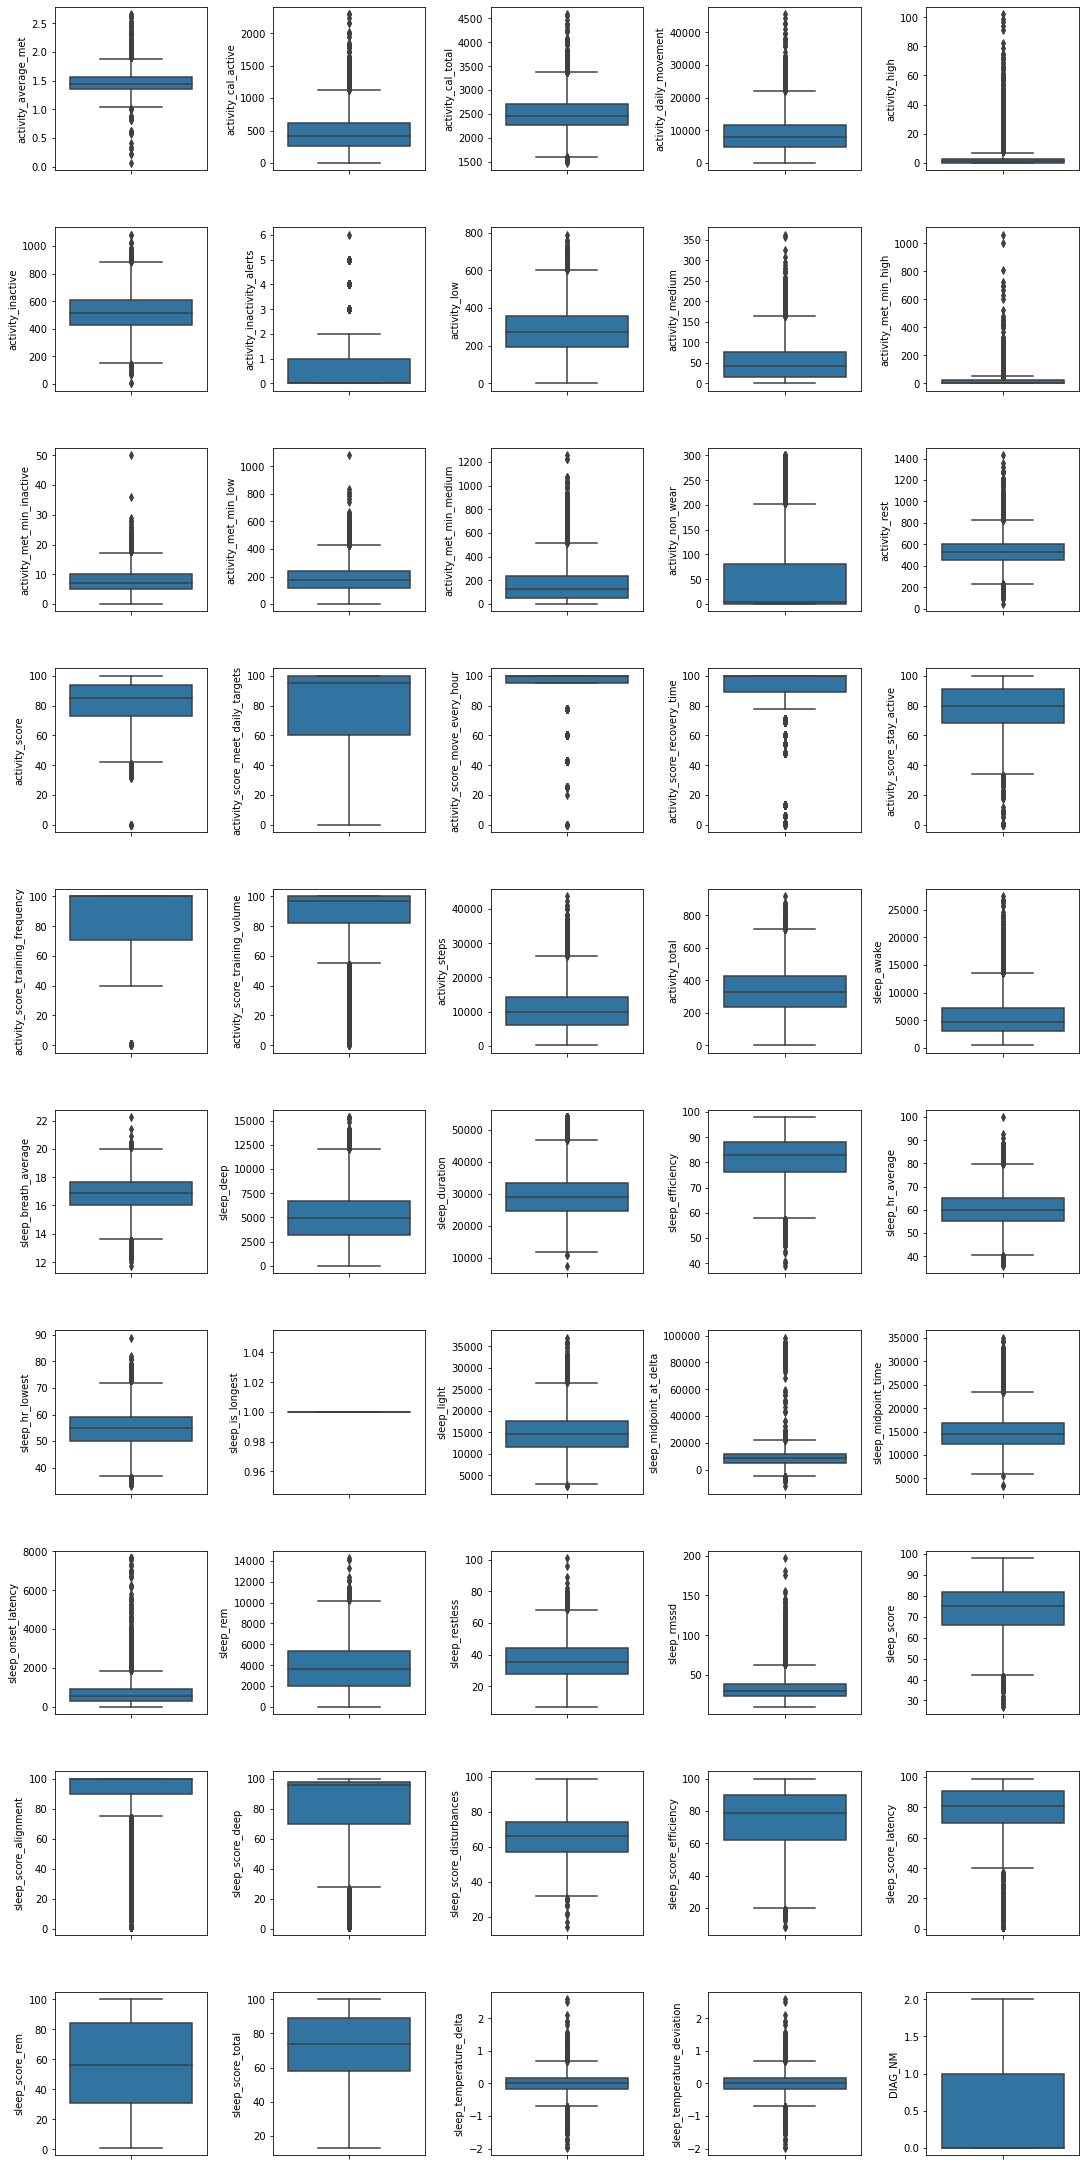

In [29]:
fig, axs = plt.subplots(ncols=5, nrows=10, figsize=(15, 30))
index = 0
axs = axs.flatten()
for label, content in df.items():
    sns.boxplot(y=label, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

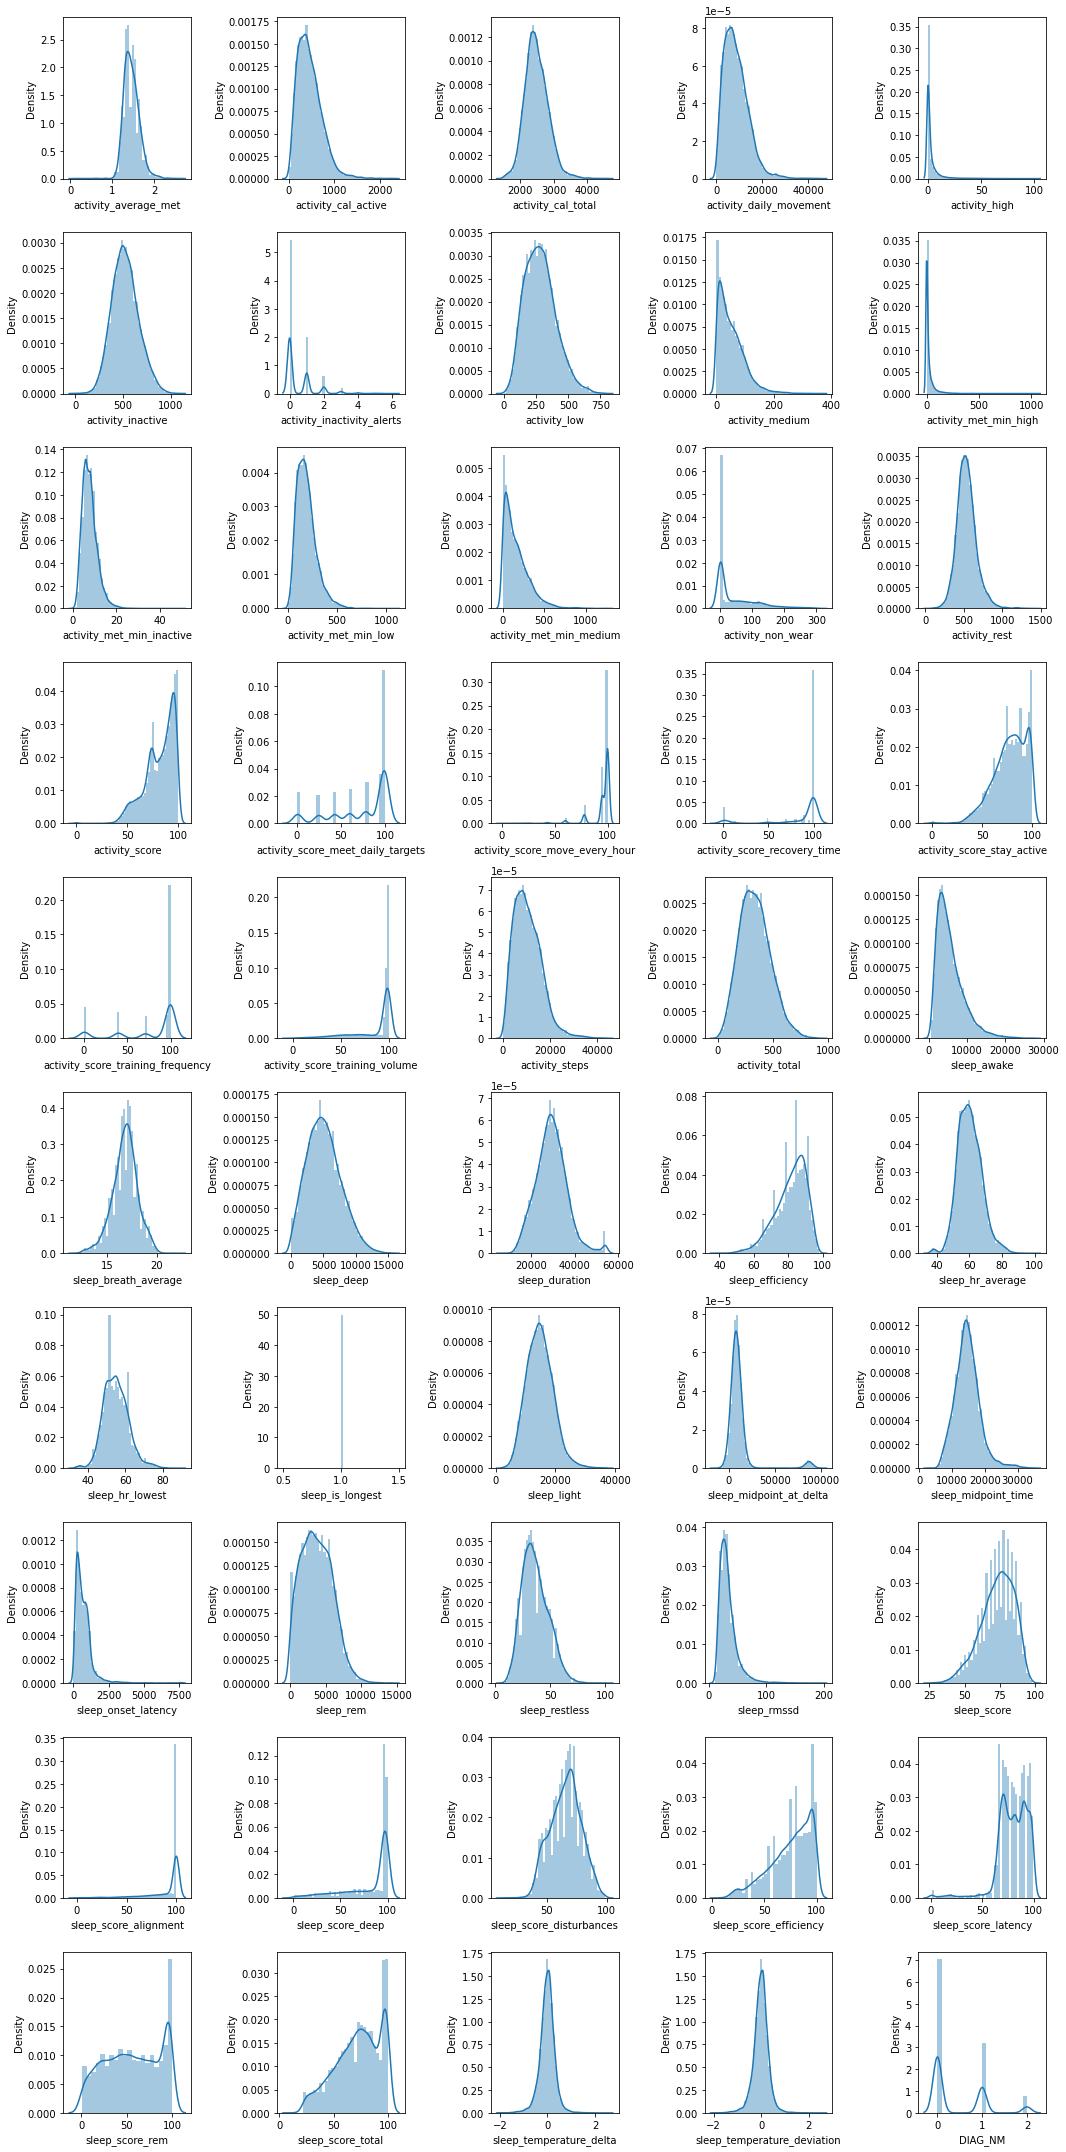

In [30]:
fig, axs = plt.subplots(ncols=5, nrows=10, figsize=(15, 30))
index = 0
axs = axs.flatten()
for label, content in df.items():
    sns.distplot(content, ax=axs[index])
    index += 1
plt.tight_layout()

In [41]:
df['sleep_is_longest'].unique()

array([1], dtype=int64)

In [4]:
df.drop(['sleep_is_longest'], axis = 1, inplace = True)

In [5]:
df

,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,activity_met_min_high,activity_met_min_inactive,activity_met_min_low,activity_met_min_medium,activity_non_wear,activity_rest,activity_score,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_stay_active,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total,sleep_awake,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_average,sleep_hr_lowest,sleep_light,sleep_midpoint_at_delta,sleep_midpoint_time,sleep_onset_latency,sleep_rem,sleep_restless,sleep_rmssd,sleep_score,sleep_score_alignment,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,DIAG_NM
0,1.71875,730,2944,14346,0,417,0,545,47,0,7,432,160,32,399,96,95,100,100,86,100,98,15867,592,13950,16.500,2100,35460,61,70.53,62,15030,6693,17280,960,4380,47,20,62,100,41,50,27,97,66,62,-0.12,-0.12,0
1,1.40625,342,2449,6352,0,473,0,392,8,0,8,249,24,29,538,91,78,100,100,83,100,97,7755,400,7680,17.375,2430,24720,69,68.01,63,12210,10495,11490,690,2400,56,19,54,100,49,43,46,91,35,44,-0.32,-0.32,0
2,1.46875,401,2544,7297,0,586,0,362,24,0,14,240,76,9,459,93,95,100,100,71,96,96,8341,386,11880,17.000,2820,33240,64,64.89,59,15780,5439,17460,1140,2760,48,26,61,100,56,47,34,89,41,62,0.07,0.07,0
3,0.34375,27,1850,491,0,176,0,34,1,0,1,18,3,19,1210,93,95,100,100,74,96,92,8122,35,9600,17.250,1770,29700,68,63.70,57,16350,7241,15750,1170,1980,59,30,55,100,35,40,44,86,29,56,-0.41,-0.41,0
4,1.46875,333,2518,5861,0,646,0,377,6,0,15,240,19,19,392,88,95,100,100,65,71,80,7378,383,10710,17.250,3150,31440,66,67.07,60,14010,6037,17220,3360,3570,42,23,56,100,64,55,39,14,54,59,-0.27,-0.27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9322,1.34375,227,2316,3863,3,735,2,155,17,21,11,98,57,0,530,72,43,78,100,49,71,97,4453,175,6360,16.250,2640,32760,81,60.21,52,18210,8734,16110,810,5550,57,29,76,100,53,46,74,97,84,82,-0.16,-0.16,0
9323,1.34375,249,2351,4411,1,780,4,167,22,7,10,106,82,0,470,61,25,43,100,45,40,95,4972,190,6000,15.875,1710,33360,82,63.75,57,19320,8017,16680,450,6330,52,18,77,100,34,57,76,81,95,86,-0.09,-0.09,0
9324,1.53125,570,2682,11057,1,518,1,332,61,7,7,257,198,0,528,78,43,95,100,76,71,93,11878,394,5700,16.125,0,27720,79,67.40,61,16140,10129,14070,600,5880,57,15,65,100,1,56,69,86,89,64,0.41,0.41,0
9325,1.34375,295,2331,5135,4,578,0,173,30,28,8,99,107,0,655,70,25,100,100,70,40,95,5752,207,5070,15.625,480,35460,86,64.84,60,22170,10630,17490,1140,7740,52,17,81,100,9,59,86,89,98,97,0.27,0.27,0


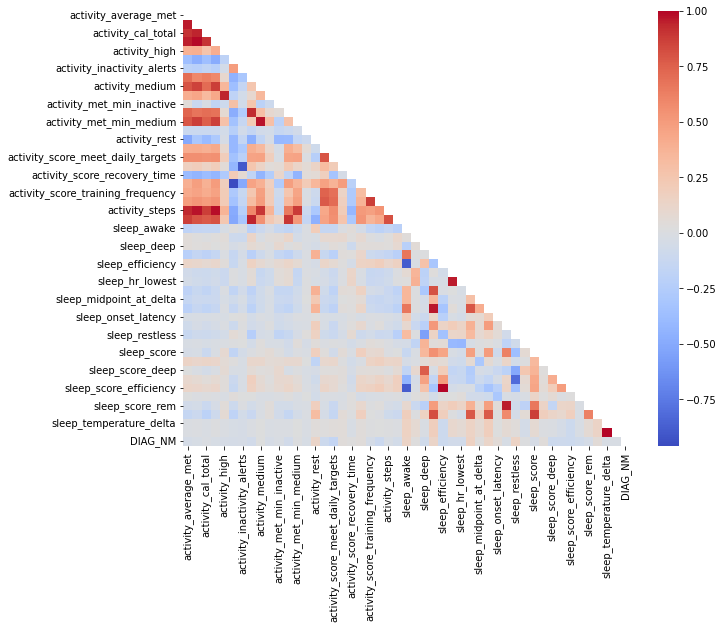

In [55]:
plt.rcParams['figure.figsize']=[10, 8]
mask = np.triu(np.ones_like(df.corr().transpose()))
sns.heatmap(df.corr().transpose(),mask=mask, cmap='coolwarm')
plt.show()

0    5969
1    2716
2     642
Name: DIAG_NM, dtype: int64


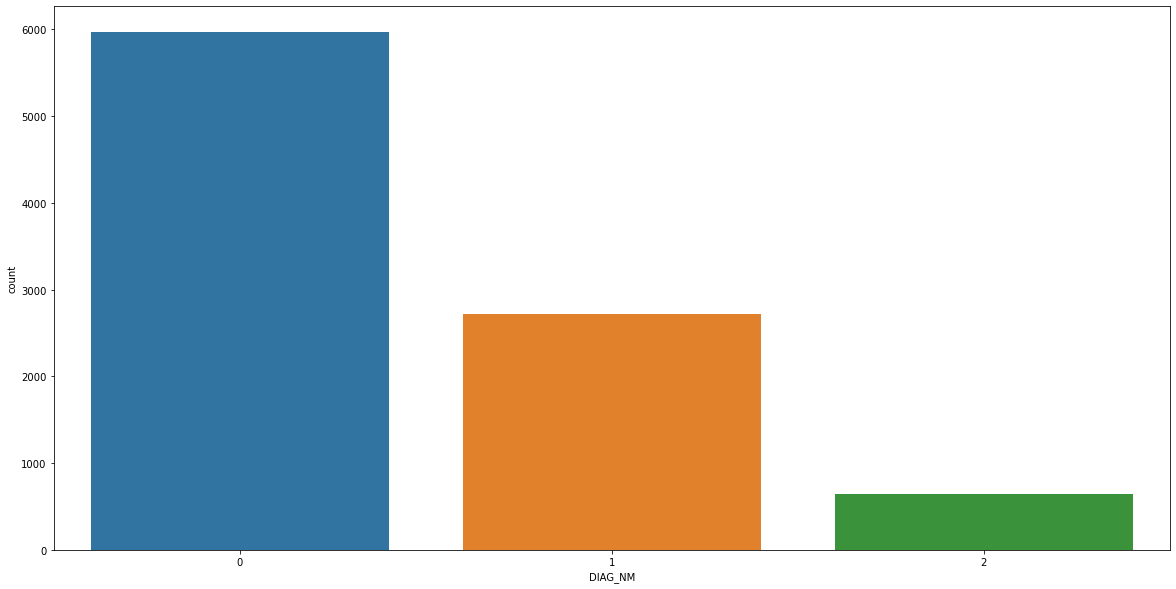

In [6]:
print(df['DIAG_NM'].value_counts())

plt.rcParams['figure.figsize']=[20, 10]
sns.countplot(x='DIAG_NM', data = df)
plt.show()

# 2. Modeling

In [7]:
modelResult = pd.DataFrame(columns=['model', 'acc', 'f1', 'auc'])

def printResult(y_test, y_pred, m):
    global modelResult
    print('confusion matrix = ')
    print(f"\n{confusion_matrix(y_test, y_pred)}")
    print('-------------------------------------------')
    print(f"acc = {accuracy_score(y_test, y_pred)}")
    print(f"f1 = {f1_score(y_test, y_pred, average='micro')}")
    labels = [0, 1, 2]
    y_test = preprocessing.label_binarize(y_test, classes=labels)
    y_pred = preprocessing.label_binarize(y_pred, classes=labels)
    print(f"roc_auc_score = {roc_auc_score(y_test, y_pred, multi_class='raise')}")
    print('-------------------------------------------')
    
    n_classes = 3
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot of a ROC curve for a specific class
    plt.figure(figsize=(15, 5))
    for idx, i in enumerate(range(n_classes)):
        plt.subplot(131+idx)
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Class %0.0f' % idx)
        plt.legend(loc="lower right")
    plt.show()
    
    modelResult = modelResult.append(pd.DataFrame([[m,
                                                    accuracy_score(y_test, y_pred),
                                                    f1_score(y_test, y_pred, average='micro'),
                                                    roc_auc_score(y_test, y_pred, multi_class='raise')]],
                                              columns=['model', 'acc', 'f1', 'auc']))

## DecisionTree
### Tuning

In [36]:
X= df.drop(['DIAG_NM'],axis=1)
y= df['DIAG_NM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 11)  # Split 실행

scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
for i in range(1,21):
    clf = DecisionTreeClassifier(max_depth = i,random_state=42)
    score = cross_val_score(clf, X_train_scaled, y_train, cv=5)
    print(f"Max_depth: {i}, score = {score.mean()}")

Max_depth: 1, score = 0.6475006688945194
Max_depth: 2, score = 0.6485727856000029
Max_depth: 3, score = 0.6487065645038779
Max_depth: 4, score = 0.6576862714113585
Max_depth: 5, score = 0.667470627001072
Max_depth: 6, score = 0.6696139625670466
Max_depth: 7, score = 0.6737678424246125
Max_depth: 8, score = 0.6756459545798176
Max_depth: 9, score = 0.6879773168441108
Max_depth: 10, score = 0.6882458622813523
Max_depth: 11, score = 0.6996383480370414
Max_depth: 12, score = 0.6960208407779648
Max_depth: 13, score = 0.6934744625948798
Max_depth: 14, score = 0.6909268274288054
Max_depth: 15, score = 0.6890501518255883
Max_depth: 16, score = 0.687309050816231
Max_depth: 17, score = 0.6869060979836197
Max_depth: 18, score = 0.6878440766472314
Max_depth: 19, score = 0.6803387210018513
Max_depth: 20, score = 0.6847599790981685


In [7]:
MAX_DEPTH = 11

confusion matrix = 

[[991 174  16]
 [257 273  10]
 [ 55  21  69]]
-------------------------------------------
acc = 0.7143622722400857
f1 = 0.7143622722400859
roc_auc_score = 0.7004827071903352
-------------------------------------------


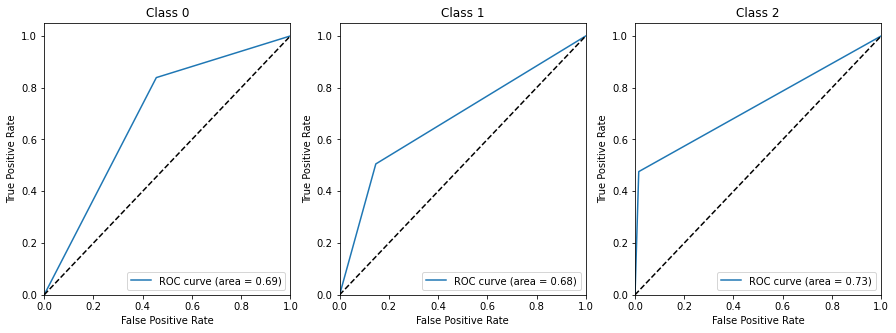

In [8]:
X= df.drop('DIAG_NM',axis=1)
y= df['DIAG_NM']
# y= preprocessing.label_binarize(y, classes=[0,1,2])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 11)  # Split 실행

scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
tree_clf = DecisionTreeClassifier(max_depth = MAX_DEPTH, random_state=42)
tree_clf.fit(X_train_scaled,y_train)

y_pred = tree_clf.predict(X_test_scaled)

printResult(y_test, y_pred, 'DecisionTree')

<AxesSubplot:xlabel='sleep_breath_average', ylabel='sleep_rmssd'>

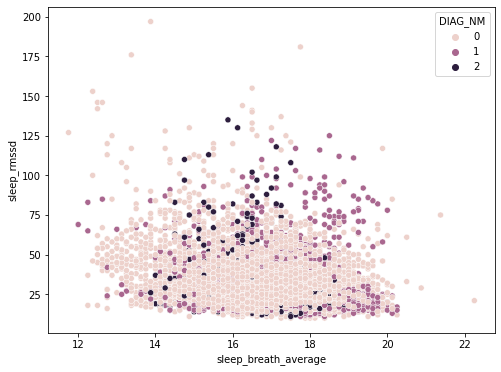

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='sleep_breath_average', y="sleep_rmssd", hue= "DIAG_NM")

### Feature Importance

In [99]:
imp_df = pd.DataFrame({
    "feature_importances_": tree_clf.feature_importances_,
    "feature_names": X.columns
})
plt.rcParams['figure.figsize']=[10, 5]
sns.barplot(x='feature_names', 
            y="feature_importances_", 
            data=imp_df, 
            order=imp_df.sort_values('feature_importances_',ascending=False).feature_names)
plt.xticks(rotation = 90)

### 변수 선택

imp = imp_df.sort_values('feature_importances_', ascending=False)

# 중요변수순으로 하나씩 추가
nlist=[]
ncount = 0
s_list = []
for n in imp['feature_names']:
    nlist.append(n)
    ncount += 1
    X = df[nlist]
    y = df['DIAG_NM']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 11)

    scaler = preprocessing.MinMaxScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    clf = DecisionTreeClassifier(max_depth=MAX_DEPTH,random_state=42)
    score = cross_val_score(clf, X_train_scaled, y_train, cv=5)
    print(f"Num of Variables: {ncount}, score = {score.mean()}")
    
    s_list.append(score.mean())

plt.plot(s_list)
plt.xlim([0, 50])
plt.ylim([0.55, 0.8])
plt.show()

In [ ]:
impVarIndex = nlist[0:8]
df[impVarIndex]

X = df[impVarIndex]
y= df['DIAG_NM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 11)  # Split 실행

scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

tree_clf = DecisionTreeClassifier(max_depth=MAX_DEPTH, random_state=42)
tree_clf.fit(X_train_scaled,y_train)

y_pred = tree_clf.predict(X_test_scaled)
    
printResult(y_test, y_pred)

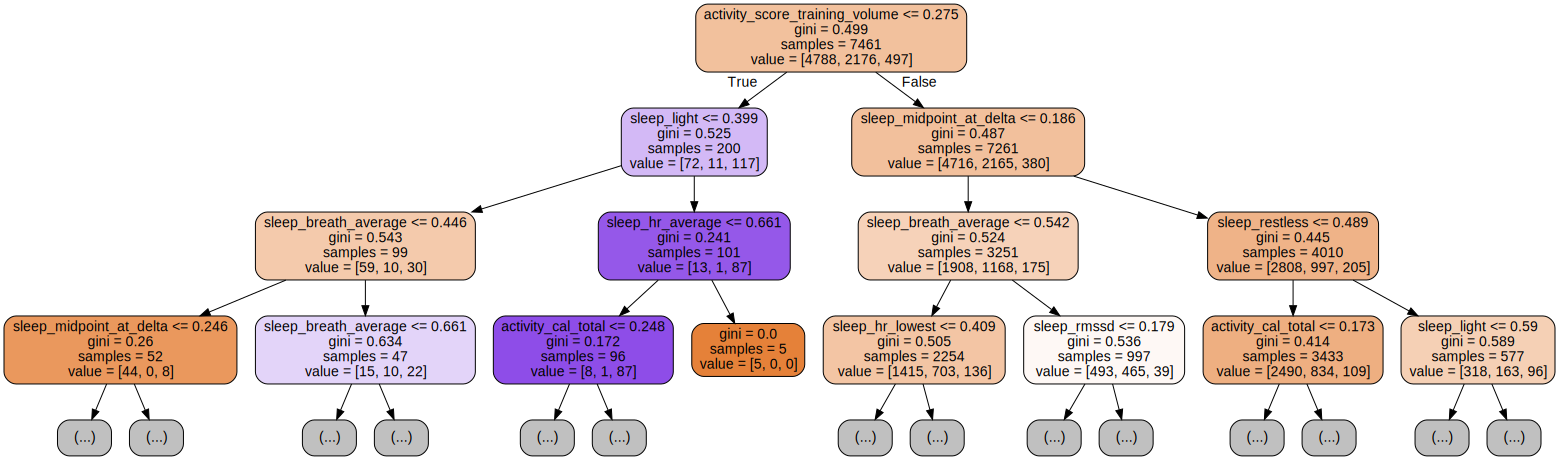

In [42]:
export_graphviz(
        tree_clf, max_depth = 3,
        out_file=os.path.join(IMAGES_PATH, "tree2.dot"),
        feature_names=X.columns,
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(IMAGES_PATH, "tree2.dot"))

## Logistic Regression

confusion matrix = 

[[1069   87   25]
 [ 419  113    8]
 [  71    9   65]]
-------------------------------------------
acc = 0.6682743837084673
f1 = 0.6682743837084673
roc_auc_score = 0.6259664466874441
-------------------------------------------


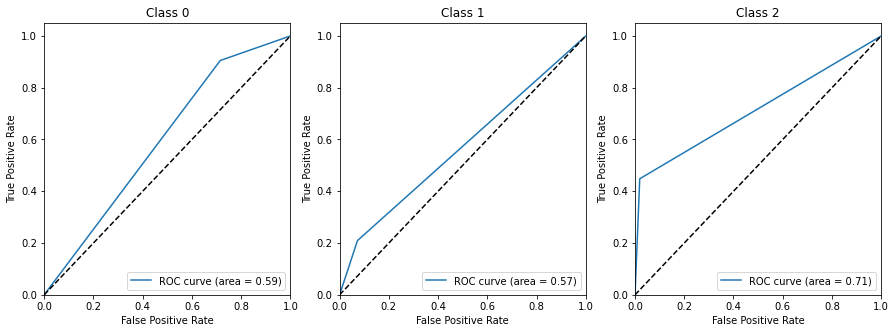

In [9]:
X= df.drop('DIAG_NM',axis=1) # y(종속변수)빼고 입력 
y= df['DIAG_NM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 11)  # Split 실행

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled,y_train)

y_pred = model.predict(X_test_scaled)
printResult(y_test, y_pred, 'LogisticRegression')

## Randomforest

confusion matrix = 

[[1158   18    5]
 [ 302  237    1]
 [  66    2   77]]
-------------------------------------------
acc = 0.7888531618435155
f1 = 0.7888531618435155
roc_auc_score = 0.7324421286165249
-------------------------------------------


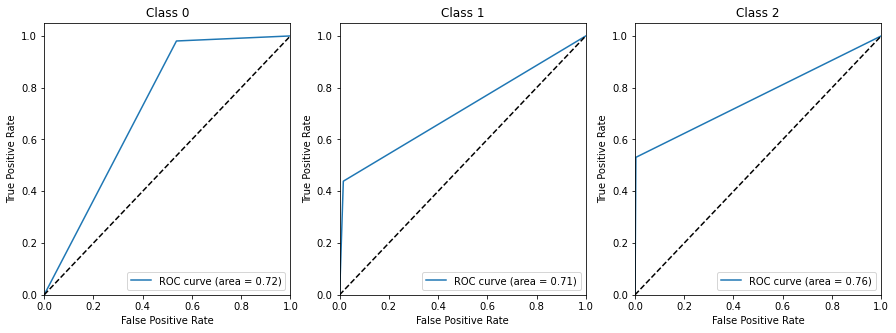

In [10]:
X= df.drop('DIAG_NM',axis=1)
y= df['DIAG_NM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 11)  # Split 실행

scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model1 = RandomForestClassifier()
rf_model1.fit(X_train_scaled, y_train)

y_pred = rf_model1.predict(X_test_scaled)
printResult(y_test, y_pred, 'RandomForest')

In [40]:
model = RandomForestClassifier()

parameters = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
searcher = GridSearchCV(model, parameters)

# fitting the object
searcher.fit(X_train_scaled, y_train)

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred = searcher.predict(X_test_scaled)

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))

The best params are : {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 10}
The best score is   : 0.7343509209196089
The test accuracy score of SVM after hyper-parameter tuning is  0.722400857449089


## kNN

confusion matrix = 

[[1032  139   10]
 [ 223  314    3]
 [  53   15   77]]
-------------------------------------------
acc = 0.762593783494105
f1 = 0.762593783494105
roc_auc_score = 0.7432899129370713
-------------------------------------------


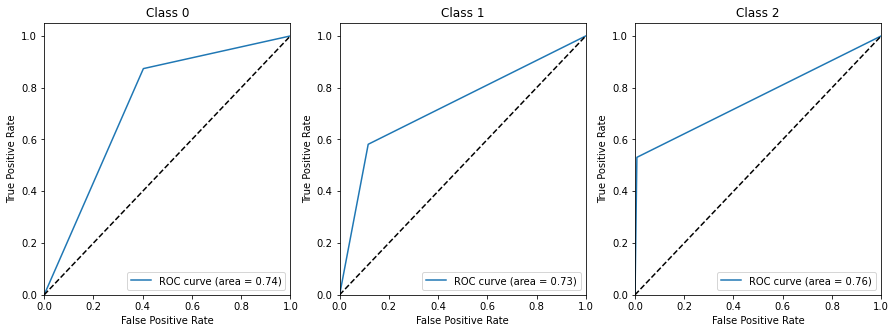

In [11]:
X= df.drop('DIAG_NM',axis=1) # y(종속변수)빼고 입력 
y= df['DIAG_NM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 11)  # Split 실행

scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_scaled, y_train)

y_pred = knn_clf.predict(X_test_scaled)
printResult(y_test, y_pred, 'kNN')

### Optimize

In [25]:
metricList = ['minkowski', 'manhattan']
weightsList = ['uniform', 'distance']
kList = []
for i in range(1,50): #홀수만
    if(i%2 == 1):
        kList.append(i)

In [26]:
scaled_cv_acc = pd.DataFrame(columns=['weights', 'metrics', 'k', 'score'])

for w in weightsList:
    for m in metricList:
        for k in kList:
            knn_clf = KNeighborsClassifier(weights = w, n_neighbors = k, metric = m)
            score = cross_val_score(knn_clf, X_train_scaled, y_train, cv=5)
            scaled_cv_acc = scaled_cv_acc.append(pd.DataFrame([[w, m, k, score.mean()]],
                                              columns=['weights', 'metrics', 'k', 'score']))           

scaled_cv_acc[scaled_cv_acc['score'] == max(scaled_cv_acc['score'])]

,weights,metrics,k,score
0,distance,manhattan,11,0.800293


confusion matrix = 

[[1081   94    6]
 [ 228  308    4]
 [  47    8   90]]
-------------------------------------------
acc = 0.792604501607717
f1 = 0.792604501607717
roc_auc_score = 0.7703654190462865
-------------------------------------------


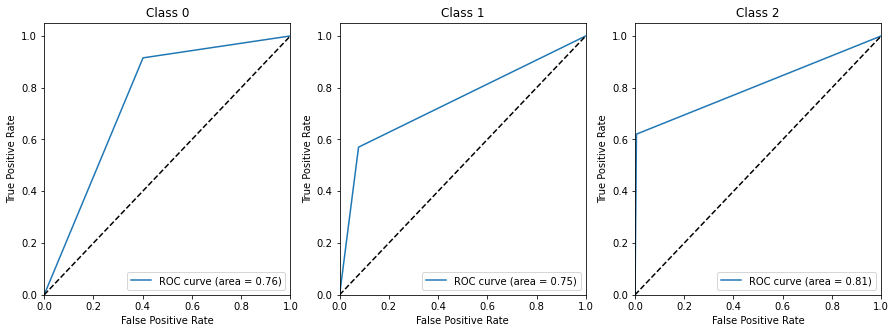

In [40]:
knn_clf = KNeighborsClassifier(weights = 'distance', n_neighbors = 11, metric = 'manhattan')
knn_clf.fit(X_train_scaled, y_train)

y_pred = knn_clf.predict(X_test_scaled)
printResult(y_test, y_pred, 'optimized_kNN')

## GaussianNB

confusion matrix = 

[[594 437 150]
 [196 299  45]
 [ 50  22  73]]
-------------------------------------------
acc = 0.5176848874598071
f1 = 0.5176848874598071
roc_auc_score = 0.6235885697804977
-------------------------------------------


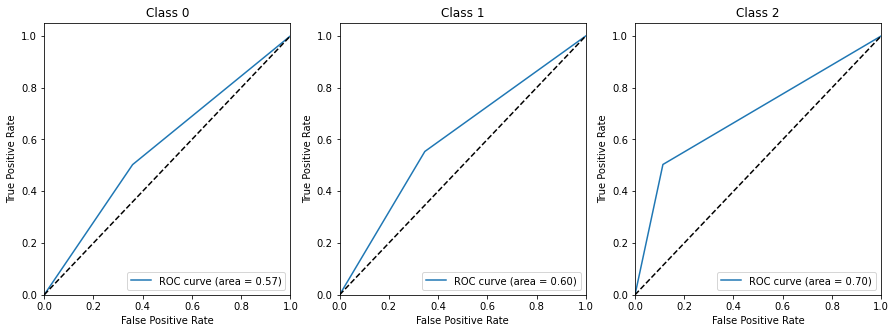

In [13]:
model = GaussianNB()
model.fit(X_train_scaled, y_train)
  
y_pred = model.predict(X_test_scaled)
  
printResult(y_test, y_pred, 'GaussianNB')

## SVM

confusion matrix = 

[[1166    7    8]
 [ 465   71    4]
 [  85    0   60]]
-------------------------------------------
acc = 0.695069667738478
f1 = 0.695069667738478
roc_auc_score = 0.6195670085252258
-------------------------------------------


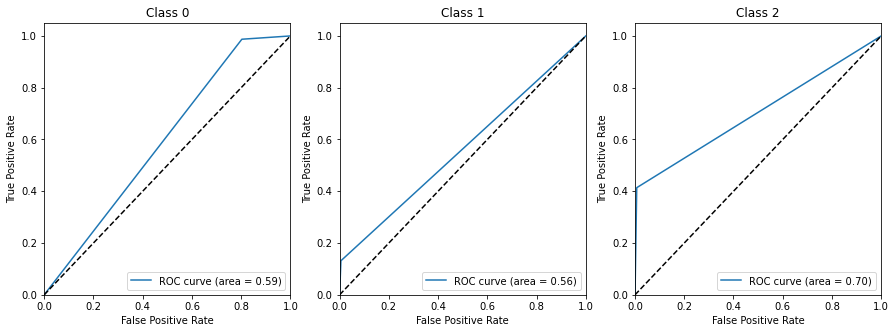

In [15]:
model = SVC()
model.fit(X_train_scaled, y_train)
  
y_pred = model.predict(X_test_scaled)
printResult(y_test, y_pred, 'SVC')

### Optimize SVM

In [13]:
# instantiating the object
svm = SVC()

# setting a grid - not so extensive
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm, parameters)

# fitting the object
searcher.fit(X_train_scaled, y_train)

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred = searcher.predict(X_test_scaled)

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))

The best params are : {'C': 8, 'gamma': 1}
The best score is   : 0.8252234287263711
The test accuracy score of SVM after hyper-parameter tuning is  0.8397642015005359


confusion matrix = 

[[1098   72   11]
 [ 173  361    6]
 [  33    4  108]]
-------------------------------------------
acc = 0.8397642015005359
f1 = 0.8397642015005359
roc_auc_score = 0.8291905902992859
-------------------------------------------


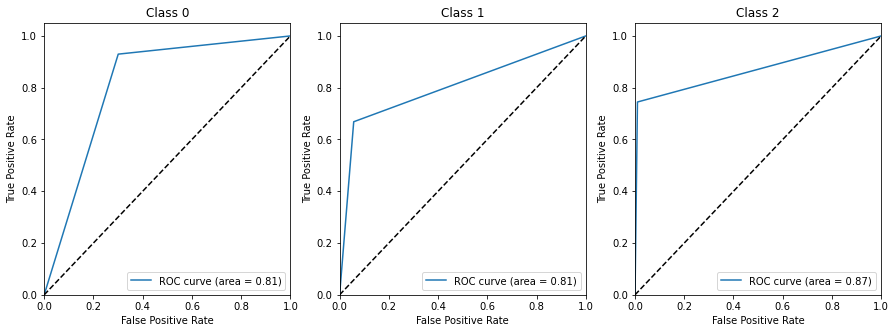

In [37]:
model = SVC(C=8, gamma=1)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
printResult(y_test, y_pred, 'optimizedSVC')

## XGBoost

confusion matrix = 

[[1137   40    4]
 [ 183  354    3]
 [  39    6  100]]
-------------------------------------------
acc = 0.852625937834941
f1 = 0.852625937834941
roc_auc_score = 0.8241847287372556
-------------------------------------------


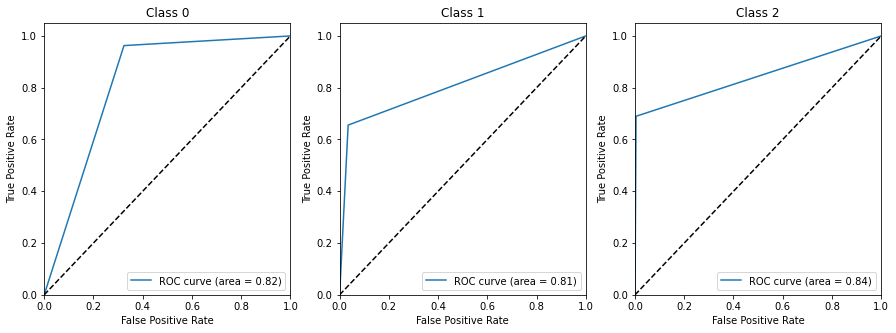

In [28]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train_scaled, y_train)
   
y_pred = model.predict(X_test_scaled)
       
printResult(y_test, y_pred, 'xgb')

### 변수중요도 및 변수선택

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, 'activity_score_meet_daily_targets'),
  Text(1, 0, 'sleep_hr_lowest'),
  Text(2, 0, 'activity_score_training_volume'),
  Text(3, 0, 'sleep_breath_average'),
  Text(4, 0, 'activity_score_move_every_hour'),
  Text(5, 0, 'activity_total'),
  Text(6, 0, 'sleep_light'),
  Text(7, 0, 'sleep_midpoint_at_delta'),
  Text(8, 0, 'sleep_rmssd'),
  Text(9, 0, 'activity_cal_total'),
  Text(10, 0, 'sleep_score_rem'),
  Text(11, 0, 'activity_daily_movement'),
  Text(12, 0, 'activity_score'),
  Text(13, 0, 'activity_score_recovery_time'),
  Text(14, 0, 'activity_met_min_inactive'),
  Text(15, 0, 'activity_medium'),
  Text(16, 0, 'sleep_score_alignment'),
  Text(17, 0, 'sleep_hr_average'),
  Text(18, 0, 'activity_met_min_medium'),
  Text(19, 0, 'activity_score_training_frequen

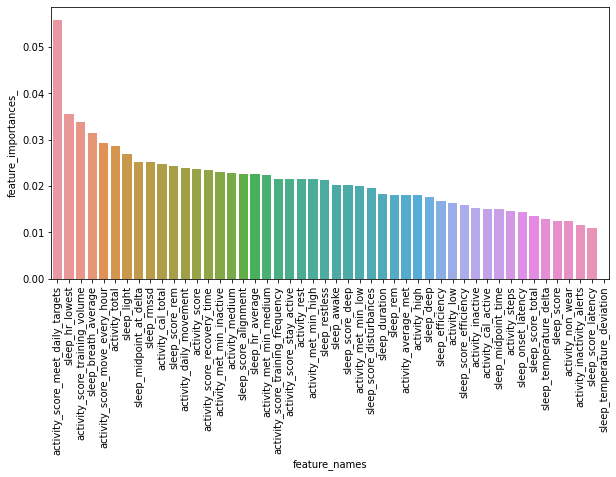

In [29]:
imp_df = pd.DataFrame({
    "feature_importances_": model.feature_importances_,
    "feature_names": X.columns
})
plt.rcParams['figure.figsize']=[10, 5]
sns.barplot(x='feature_names', 
            y="feature_importances_", 
            data=imp_df, 
            order=imp_df.sort_values('feature_importances_',ascending=False).feature_names)
plt.xticks(rotation = 90)

### 변수 선택

Num of Variables: 1, score = 0.6417370427499914
Num of Variables: 2, score = 0.6405303390801398
Num of Variables: 3, score = 0.6492428473178677
Num of Variables: 4, score = 0.682214857898073
Num of Variables: 5, score = 0.6867724088642442
Num of Variables: 6, score = 0.7044625589659699
Num of Variables: 7, score = 0.7138454880595595
Num of Variables: 8, score = 0.7381040925570446
Num of Variables: 9, score = 0.7705407181682526
Num of Variables: 10, score = 0.7831390995333003
Num of Variables: 11, score = 0.7976145156395619
Num of Variables: 12, score = 0.8002946727265219
Num of Variables: 13, score = 0.8072638353424113
Num of Variables: 14, score = 0.8079345255517707
Num of Variables: 15, score = 0.8124912684574486
Num of Variables: 16, score = 0.8138332773676622
Num of Variables: 17, score = 0.8126242393008303
Num of Variables: 18, score = 0.820668122372681
Num of Variables: 19, score = 0.8221417553587879
Num of Variables: 20, score = 0.8236144007154029
Num of Variables: 21, score = 0

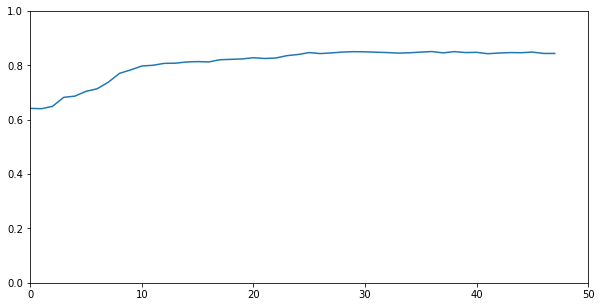

In [31]:
imp = imp_df.sort_values('feature_importances_', ascending=False)

# 중요변수순으로 하나씩 추가
nlist=[]
ncount = 0
s_list = []
for n in imp['feature_names']:
    nlist.append(n)
    ncount += 1
    X = df[nlist]
    y = df['DIAG_NM']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 11)

    scaler = preprocessing.MinMaxScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    model.fit(X_train_scaled, y_train)
    score = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"Num of Variables: {ncount}, score = {score.mean()}")
    
    s_list.append(score.mean())

plt.plot(s_list)
plt.xlim([0, 50])
plt.ylim([0, 1])
plt.show()

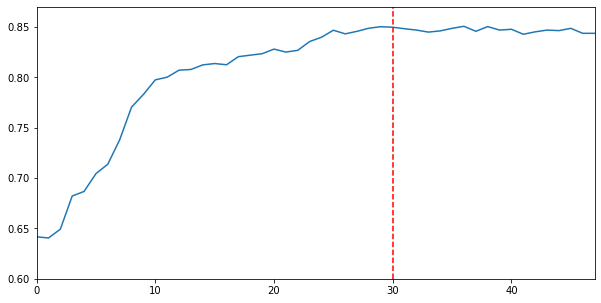

In [56]:
plt.plot(s_list)
plt.xlim([0, 47])
plt.ylim([0.6, 0.87])
plt.plot([30, 30], [0.6, 1], color="red", linestyle="--")
plt.show()

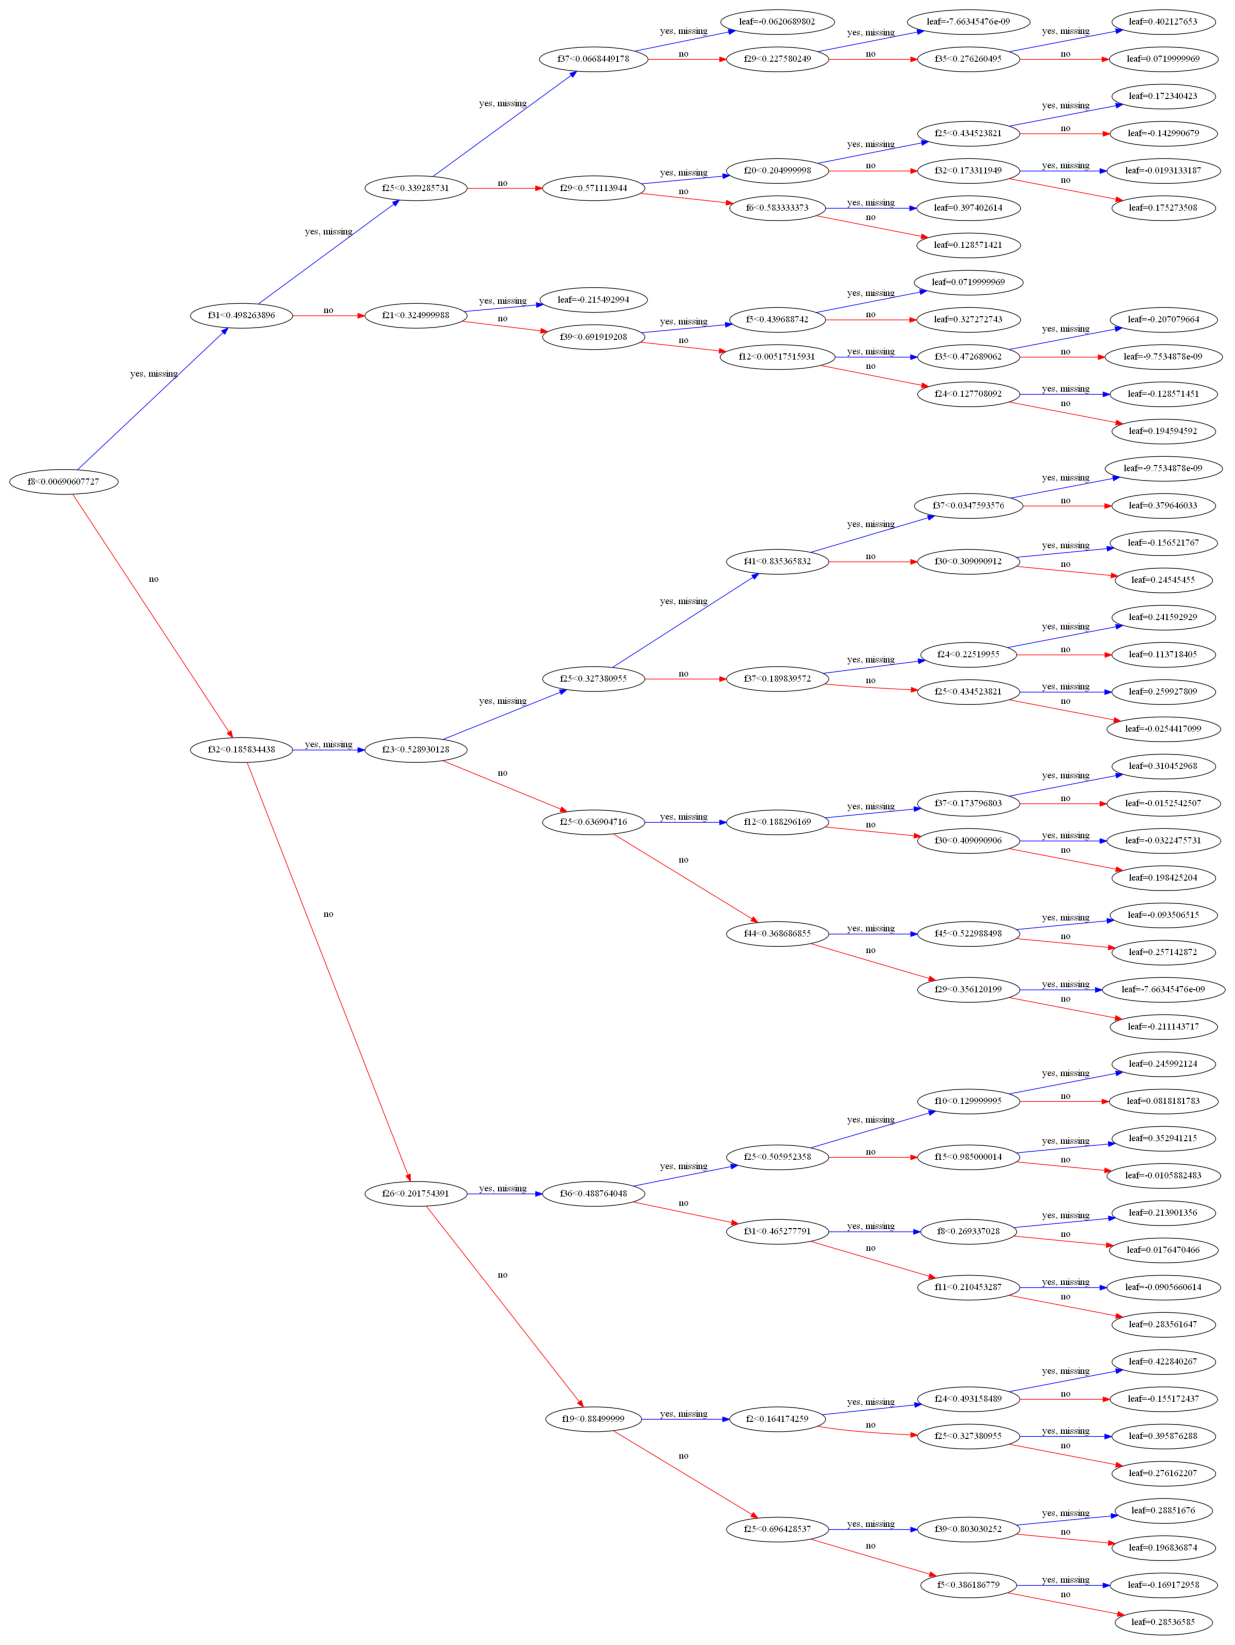

In [45]:
fig, ax = plt.subplots(figsize=(30, 30))

plot_tree(model,num_trees=0,rankdir="LR",ax=ax)
plt.show()

## 평가

In [63]:
modelResult

,model,acc,f1,auc
0,DecisionTree,0.714362,0.714362,0.700483
0,LogisticRegression,0.668274,0.668274,0.625966
0,RandomForest,0.788317,0.788317,0.73189
0,optimized_kNN,0.792605,0.792605,0.770365
0,kNN,0.762594,0.762594,0.74329
0,GaussianNB,0.517685,0.517685,0.623589
0,SVC,0.69507,0.69507,0.619567
0,optimizedSVC,0.839764,0.839764,0.829191
0,xgb,0.852626,0.852626,0.824185


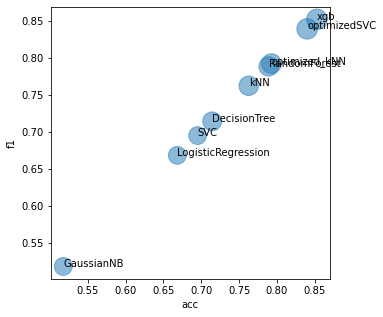

In [19]:
users = modelResult.model

x = modelResult.acc
y =  modelResult.f1
s = modelResult.auc

result_df = pd.DataFrame(dict(acc=x, f1=y, users=users, s=(pd.to_numeric(s)*8**3))) # size 크기는 값에 다라 조정

# 그래프 그리기
plt.rcParams['figure.figsize']=[5, 5]
ax = result_df.plot.scatter(x='acc', y='f1', s=result_df.s, alpha=0.5)
for i, txt in enumerate(users):
    ax.annotate(txt, (result_df.acc.iat[i],result_df.f1.iat[i]))
plt.show()

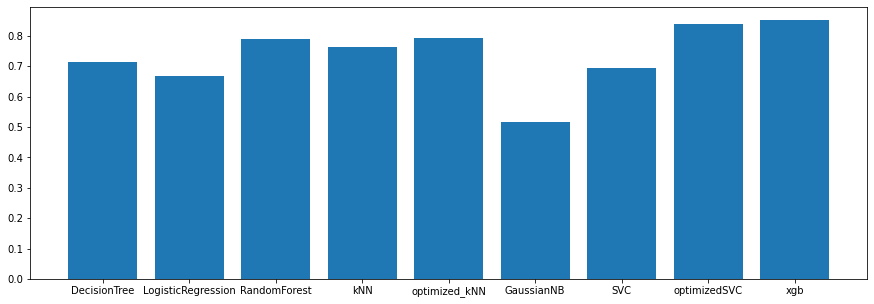

In [23]:
plt.rcParams['figure.figsize']=[15, 5]
plt.bar(modelResult['model'],modelResult['f1'])
# plt.xticks(x, years)

plt.show()

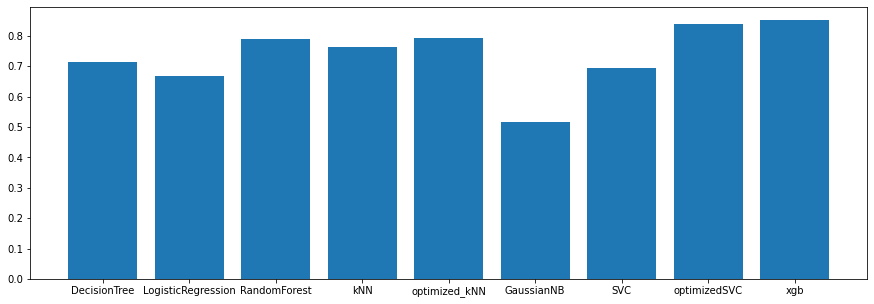

In [21]:
plt.rcParams['figure.figsize']=[15, 5]
plt.bar(modelResult['model'],modelResult['acc'])
# plt.xticks(x, years)

plt.show()

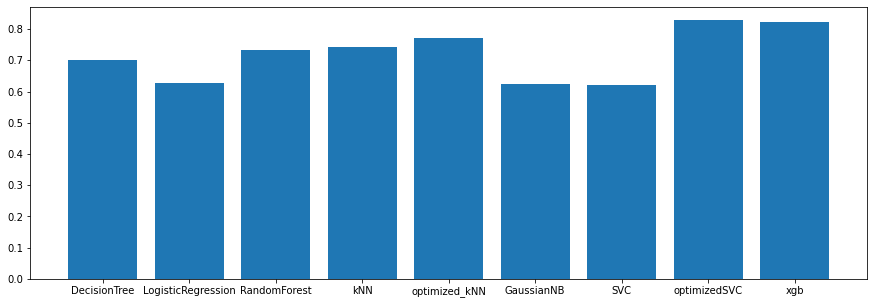

In [22]:
plt.rcParams['figure.figsize']=[15, 5]
plt.bar(modelResult['model'],modelResult['auc'])
# plt.xticks(x, years)

plt.show()